### GAD skip 1

In [3]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 1',"% of additional relations skip 1"])

dataset = "gad"
for seed in seeds:
    # print(f"SEED value: {seed}")
    for sample_size in [35,71,106,142,177,213,248,284,319,355]:
        kb_ = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples_generate/{seed}/skip1/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples_generate/{seed}/{sample_size}_sample_val_{dataset}.csv")
        # full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['gene_mention'].lower(), row['disease_mention'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        # Count the matches
        matches_count = kb_['is_present'].sum()
        # print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100
        print(kb_.shape[0])
        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': original_sample['entity_pair'].shape[0],
            '# of additional relations skip 1': kb_['entity_pair'].shape[0],
            '% of additional relations skip 1': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 1']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 1']].astype(int)

15
51
89
130
177
275
352
421
548
669
10
47
92
159
229
313
407


/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

526
621
733
13
34
78
125
192
265
340
447
530
664


/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3194352718.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

In [4]:
results_df

,seed,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,0,35,35,15,42.857143
1,0,71,71,51,71.830986
2,0,106,106,89,83.962264
3,0,142,142,130,91.549296
4,0,177,177,177,100.000000
5,0,213,213,275,129.107981
6,0,248,248,352,141.935484
7,0,284,284,421,148.239437
8,0,319,319,548,171.786834
9,0,355,355,669,188.450704


In [5]:
average_df_1 = results_df.groupby('% sample_size').mean().reset_index()

In [6]:
average_df_1[['% sample_size','# of relations', '# of additional relations skip 1','% of additional relations skip 1']]

,% sample_size,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,35,35.0,12.666667,36.190476
1,71,71.0,44.000000,61.971831
2,106,106.0,86.333333,81.446541
3,142,142.0,138.000000,97.183099
4,177,177.0,199.333333,112.617702
5,213,213.0,284.333333,133.489828
6,248,248.0,366.333333,147.715054
7,284,284.0,464.666667,163.615023
8,319,319.0,566.333333,177.533960
9,355,355.0,688.666667,193.990610


### GAD skip 2

In [7]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 2',"% of additional relations skip 2"])

dataset = "gad"
# sample_size = 20
for seed in seeds:
    print(f"SEED value: {seed}")
    for sample_size in [35,71,106,142,177,213,248,284,319,355]:
        kb_ = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples_generate/{seed}/skip2/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples_generate/{seed}/{sample_size}_sample_val_{dataset}.csv")
        # full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['gene_mention'].lower(), row['disease_mention'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100

        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': original_sample['entity_pair'].shape[0],
            '# of additional relations skip 2': kb_['entity_pair'].shape[0],
            '% of additional relations skip 2': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 2']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 2']].astype(int)

SEED value: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 42
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

Number of matching pairs: 0


/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 144
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/4042746148.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

In [8]:
# results_df

In [9]:
average_df_2 = results_df.groupby('% sample_size').mean().reset_index()

In [10]:
average_df_2[['% sample_size','# of relations', '# of additional relations skip 2','% of additional relations skip 2']]

,% sample_size,# of relations,# of additional relations skip 2,% of additional relations skip 2
0,35,35.0,13.666667,39.047619
1,71,71.0,54.000000,76.056338
2,106,106.0,115.000000,108.490566
3,142,142.0,197.666667,139.201878
4,177,177.0,290.666667,164.218456
5,213,213.0,459.333333,215.649452
6,248,248.0,607.333333,244.892473
7,284,284.0,798.666667,281.220657
8,319,319.0,1011.333333,317.032393
9,355,355.0,1258.000000,354.366197


### SKIP 3

In [11]:
import pandas as pd
seeds = [0,42,144]
results_df = pd.DataFrame(columns=['seed','% sample_size', '# of relations', '# of additional relations skip 3',"% of additional relations skip 3"])

dataset = "gad"
# sample_size = 20
for seed in seeds:
    print(f"SEED value: {seed}")
    for sample_size in [35,71,106,142,177,213,248,284,319,355]:
        kb_ = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples_generate/{seed}/skip3/{sample_size}_sample_val_{dataset}.csv")
        original_sample = pd.read_csv(f"/home/016651544/gemma/datasets/gad_samples_generate/{seed}/{sample_size}_sample_val_{dataset}.csv")
        # full_data = pd.read_csv(f"/home/016651544/gemma/{dataset}_unmasked.csv")
        # Create tuples of entity combinations in both dataframes
        original_sample['entity_pair'] = original_sample.apply(lambda row: tuple(sorted([row['gene_mention'].lower(), row['disease_mention'].lower()])), axis=1)
        kb_['entity_pair'] = kb_.apply(lambda row: tuple(sorted([row['ent1'].lower(), row['ent2'].lower()])), axis=1)
        # Check if the entity pairs in df2 are present in df1
        kb_['is_present'] = kb_['entity_pair'].isin(original_sample['entity_pair'])
        
        # Count the matches
        matches_count = kb_['is_present'].sum()
        print(f"Number of matching pairs: {matches_count}")
        # print(original_sample['entity_pair'].shape, kb_['entity_pair'].shape)
        percentage_additional = ((kb_['entity_pair'].shape[0] - matches_count) / original_sample['entity_pair'].shape[0]) * 100

        results_df = results_df.append({
            'seed': seed,
           '% sample_size': sample_size,
             '# of relations': len(original_sample['entity_pair'].unique()),
            '# of additional relations skip 3': kb_['entity_pair'].shape[0],
            '% of additional relations skip 3': percentage_additional#(original_sample['entity_pair'].shape[0]+kb_['entity_pair'].shape[0])*100/original_sample['entity_pair'].shape[0]
        }, ignore_index=True)


results_df[['seed', '% sample_size','# of relations', '# of additional relations skip 3']] = results_df[['seed','% sample_size', '# of relations', '# of additional relations skip 3']].astype(int)

SEED value: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 42
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

Number of matching pairs: 0


/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
SEED value: 144
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

Number of matching pairs: 0
Number of matching pairs: 0


/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_6450/3846317129.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [12]:
results_df

,seed,% sample_size,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,0,35,35,18,51.428571
1,0,71,71,79,111.267606
2,0,106,106,158,149.056604
3,0,142,141,241,169.718310
4,0,177,173,385,217.514124
5,0,213,208,677,317.840376
6,0,248,243,883,356.048387
7,0,284,275,1144,402.816901
8,0,319,306,1690,529.780564
9,0,355,338,2194,618.028169


In [13]:
average_df_3 = results_df.groupby('% sample_size').mean().reset_index()

In [14]:
average_df_3[['% sample_size','# of relations', '# of additional relations skip 3','% of additional relations skip 3']]

,% sample_size,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,35,35.000000,13.666667,39.047619
1,71,71.000000,58.333333,82.159624
2,106,106.000000,130.666667,123.270440
3,142,140.333333,234.333333,165.023474
4,177,174.000000,363.666667,205.461394
5,213,209.000000,612.666667,287.636933
6,248,242.333333,849.000000,342.338710
7,284,276.000000,1213.000000,427.112676
8,319,308.000000,1625.000000,509.404389
9,355,341.000000,2099.666667,591.455399


In [15]:
average_df_1

,% sample_size,seed,# of relations,# of additional relations skip 1,% of additional relations skip 1
0,35,62.0,35.0,12.666667,36.190476
1,71,62.0,71.0,44.000000,61.971831
2,106,62.0,106.0,86.333333,81.446541
3,142,62.0,142.0,138.000000,97.183099
4,177,62.0,177.0,199.333333,112.617702
5,213,62.0,213.0,284.333333,133.489828
6,248,62.0,248.0,366.333333,147.715054
7,284,62.0,284.0,464.666667,163.615023
8,319,62.0,319.0,566.333333,177.533960
9,355,62.0,355.0,688.666667,193.990610


In [16]:
average_df_2

,% sample_size,seed,# of relations,# of additional relations skip 2,% of additional relations skip 2
0,35,62.0,35.0,13.666667,39.047619
1,71,62.0,71.0,54.000000,76.056338
2,106,62.0,106.0,115.000000,108.490566
3,142,62.0,142.0,197.666667,139.201878
4,177,62.0,177.0,290.666667,164.218456
5,213,62.0,213.0,459.333333,215.649452
6,248,62.0,248.0,607.333333,244.892473
7,284,62.0,284.0,798.666667,281.220657
8,319,62.0,319.0,1011.333333,317.032393
9,355,62.0,355.0,1258.000000,354.366197


In [17]:
average_df_3

,% sample_size,seed,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,35,62.0,35.000000,13.666667,39.047619
1,71,62.0,71.000000,58.333333,82.159624
2,106,62.0,106.000000,130.666667,123.270440
3,142,62.0,140.333333,234.333333,165.023474
4,177,62.0,174.000000,363.666667,205.461394
5,213,62.0,209.000000,612.666667,287.636933
6,248,62.0,242.333333,849.000000,342.338710
7,284,62.0,276.000000,1213.000000,427.112676
8,319,62.0,308.000000,1625.000000,509.404389
9,355,62.0,341.000000,2099.666667,591.455399


In [44]:
df_final = pd.merge(average_df_1, average_df_2, on = ['% sample_size'], how="inner")
df_final = pd.merge(df_final, average_df_3, on = ['% sample_size'], how="inner")

In [45]:
df_final.drop(columns = ['seed','seed_x','seed_y'],inplace=True)

In [46]:
df_final

,% sample_size,# of relations_x,# of additional relations skip 1,% of additional relations skip 1,# of relations_y,# of additional relations skip 2,% of additional relations skip 2,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,35,35.0,12.666667,36.190476,35.0,13.666667,39.047619,35.000000,13.666667,39.047619
1,71,71.0,44.000000,61.971831,71.0,54.000000,76.056338,71.000000,58.333333,82.159624
2,106,106.0,86.333333,81.446541,106.0,115.000000,108.490566,106.000000,130.666667,123.270440
3,142,142.0,138.000000,97.183099,142.0,197.666667,139.201878,140.333333,234.333333,165.023474
4,177,177.0,199.333333,112.617702,177.0,290.666667,164.218456,174.000000,363.666667,205.461394
5,213,213.0,284.333333,133.489828,213.0,459.333333,215.649452,209.000000,612.666667,287.636933
6,248,248.0,366.333333,147.715054,248.0,607.333333,244.892473,242.333333,849.000000,342.338710
7,284,284.0,464.666667,163.615023,284.0,798.666667,281.220657,276.000000,1213.000000,427.112676
8,319,319.0,566.333333,177.533960,319.0,1011.333333,317.032393,308.000000,1625.000000,509.404389
9,355,355.0,688.666667,193.990610,355.0,1258.000000,354.366197,341.000000,2099.666667,591.455399


In [50]:
columns = ['# of relations','# of additional relations skip 1','# of additional relations skip 2','# of additional relations skip 3',
       '% of additional relations skip 1', '% of additional relations skip 2', 
       '% of additional relations skip 3']
df_final[columns] = df_final[columns].round(2)
df_final.rename(columns = {'% sample_size':'sample_size'},inplace=True)
df_final

,sample_size,# of relations_x,# of additional relations skip 1,% of additional relations skip 1,# of relations_y,# of additional relations skip 2,% of additional relations skip 2,# of relations,# of additional relations skip 3,% of additional relations skip 3
0,35,35.0,12.67,36.19,35.0,13.67,39.05,35.00,13.67,39.05
1,71,71.0,44.00,61.97,71.0,54.00,76.06,71.00,58.33,82.16
2,106,106.0,86.33,81.45,106.0,115.00,108.49,106.00,130.67,123.27
3,142,142.0,138.00,97.18,142.0,197.67,139.20,140.33,234.33,165.02
4,177,177.0,199.33,112.62,177.0,290.67,164.22,174.00,363.67,205.46
5,213,213.0,284.33,133.49,213.0,459.33,215.65,209.00,612.67,287.64
6,248,248.0,366.33,147.72,248.0,607.33,244.89,242.33,849.00,342.34
7,284,284.0,464.67,163.62,284.0,798.67,281.22,276.00,1213.00,427.11
8,319,319.0,566.33,177.53,319.0,1011.33,317.03,308.00,1625.00,509.40
9,355,355.0,688.67,193.99,355.0,1258.00,354.37,341.00,2099.67,591.46


In [30]:
cols= [ 'sample_size','# of relations','% of additional relations skip 1', '% of additional relations skip 2', 
       '% of additional relations skip 3']
df_final[cols]

,sample_size,# of relations,% of additional relations skip 1,% of additional relations skip 2,% of additional relations skip 3
0,35,35.00,36.19,39.05,39.05
1,71,71.00,61.97,76.06,82.16
2,106,106.00,81.45,108.49,123.27
3,142,140.33,97.18,139.20,165.02
4,177,174.00,112.62,164.22,205.46
5,213,209.00,133.49,215.65,287.64
6,248,242.33,147.72,244.89,342.34
7,284,276.00,163.62,281.22,427.11
8,319,308.00,177.53,317.03,509.40
9,355,341.00,193.99,354.37,591.46


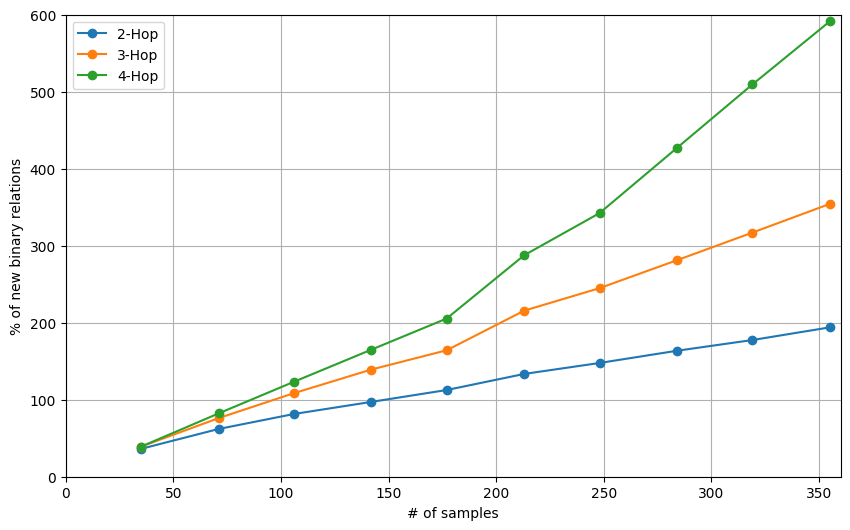

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 1'], label='2-Hop', marker='o')
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 2'], label='3-Hop', marker='o')
plt.plot(df_final['sample_size'], df_final['% of additional relations skip 3'], label='4-Hop', marker='o')

# Labeling
# Adjusting the x-axis and y-axis as per request
plt.ylim(0, 600)  # Y-axis now goes up to 500
plt.xlim(0, 360)  # X-axis now goes up to 800
# plt.title('Percentage of Additional Relations by Hop Level')
# plt.axhline(y=400,color = 'r', linestyle='dotted')
plt.xlabel('# of samples')
plt.ylabel('% of new binary relations')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()